# **Quantum Walks on Graphs**
**Introduction to Quantum Walks**\
Quantum walks are the quantum analog of classical random walks. They are useful in various quantum algorithms and have applications in areas like quantum search, quantum transport, and quantum computing.\
In this notebook, we'll first implement a quantum walk on a circle with 4 nodes, as covered in the example from the provided link. Then, we'll design and implement a quantum walk on a line with 16 nodes.


## **Quantum Walk on a Circle with 4 Nodes**
**Algorithm Explanation**\
A quantum walk on a circle with 4 nodes involves the following steps:
1. Define the shift operator that moves the walker to the neighboring nodes.
2. Define the coin operator that determines the direction of the walk.
3. Combine these operators to form the quantum walk operator.
4. Initialize the walker's state.
5. Apply the quantum walk operator iteratively.

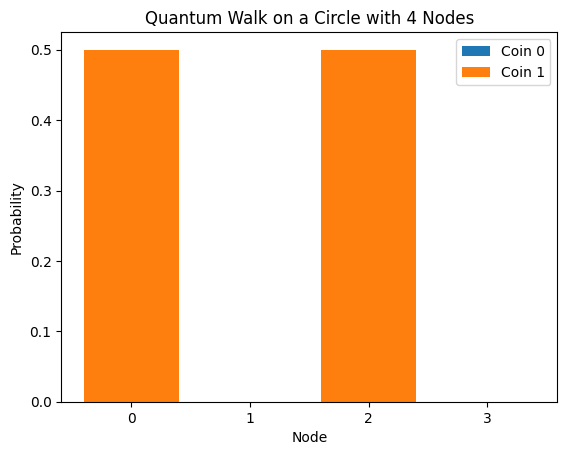

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shift operator for a circle with 4 nodes
def shift_operator_circle():
    shift_op = np.zeros((8, 8), dtype=complex)
    shift_op[0, 1] = 1
    shift_op[1, 0] = 1
    shift_op[2, 3] = 1
    shift_op[3, 2] = 1
    shift_op[4, 5] = 1
    shift_op[5, 4] = 1
    shift_op[6, 7] = 1
    shift_op[7, 6] = 1
    return shift_op

# Define the coin operator (Hadamard gate)
def coin_operator():
    H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    return np.kron(np.eye(4), H)

# Combine the coin and shift operators
def quantum_walk_operator_circle():
    shift_op = shift_operator_circle()
    coin_op = coin_operator()
    return np.dot(shift_op, coin_op)

# Initialize the walker's state
initial_state = np.zeros(8, dtype=complex)
initial_state[0] = 1 / np.sqrt(2)
initial_state[4] = 1 / np.sqrt(2)

# Apply the quantum walk operator
def apply_quantum_walk_circle(initial_state, steps):
    qwalk_op = quantum_walk_operator_circle()
    state = initial_state.copy()
    for _ in range(steps):
        state = np.dot(qwalk_op, state)
    return state

# Visualize the results
def plot_probabilities_circle(state):
    probabilities = np.abs(state)**2
    nodes = ['0', '1', '2', '3']
    plt.bar(nodes, probabilities[::2], label='Coin 0')
    plt.bar(nodes, probabilities[1::2], bottom=probabilities[::2], label='Coin 1')
    plt.xlabel('Node')
    plt.ylabel('Probability')
    plt.title('Quantum Walk on a Circle with 4 Nodes')
    plt.legend()
    plt.show()

# Run the quantum walk
steps = 10
final_state_circle = apply_quantum_walk_circle(initial_state, steps)
plot_probabilities_circle(final_state_circle)

# **Quantum Walk on a Line with 16 Nodes**
 **Algorithm Explanation**\
For a line with 16 nodes, the algorithm involves similar steps:

1. Define the shift operator that moves the walker to the neighboring nodes.
2. Define the coin operator.
3. Combine these operators to form the quantum walk operator.
4. Initialize the walker's state.
5. Apply the quantum walk operator iteratively.

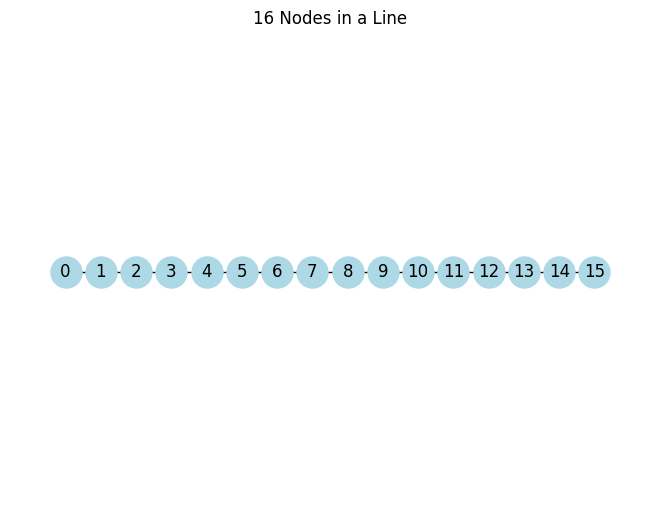

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add 16 nodes to the graph
for i in range(16):
    G.add_node(i)

# Add edges between consecutive nodes to form a line
for i in range(15):
    G.add_edge(i, i + 1)

# Draw the graph
pos = {i: (i, 0) for i in range(16)}  # Position nodes in a straight line
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_color='black')
plt.title('16 Nodes in a Line')
plt.show()

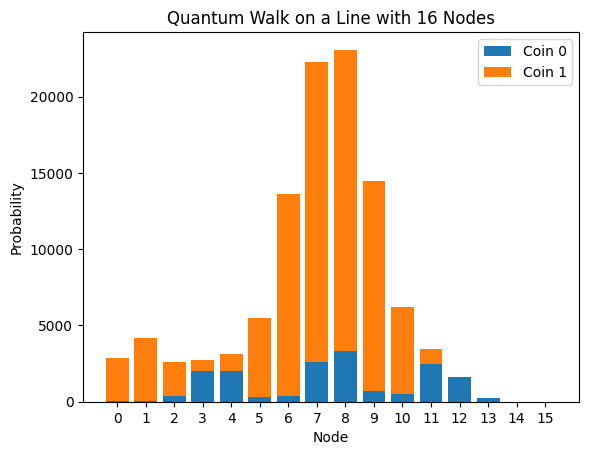

In [4]:
# Define the shift operator for a line with 16 nodes
def shift_operator_line():
    n = 16
    shift_op = np.zeros((2*n, 2*n), dtype=complex)
    for i in range(n-1):
        shift_op[2*i, 2*i+1] = 1
        shift_op[2*i+1, 2*i] = 1
        shift_op[2*i+1, 2*i+2] = 1
        shift_op[2*i+2, 2*i+1] = 1
    return shift_op

# Define the coin operator (Hadamard gate)
def coin_operator_line():
    H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    return np.kron(np.eye(16), H)

# Combine the coin and shift operators
def quantum_walk_operator_line():
    shift_op = shift_operator_line()
    coin_op = coin_operator_line()
    return np.dot(shift_op, coin_op)

# Initialize the walker's state
initial_state_line = np.zeros(32, dtype=complex)
initial_state_line[0] = 1 / np.sqrt(2)
initial_state_line[16] = 1 / np.sqrt(2)

# Apply the quantum walk operator
def apply_quantum_walk_line(initial_state, steps):
    qwalk_op = quantum_walk_operator_line()
    state = initial_state.copy()
    for _ in range(steps):
        state = np.dot(qwalk_op, state)
    return state

# Visualize the results
def plot_probabilities_line(state):
    probabilities = np.abs(state)**2
    nodes = [str(i) for i in range(16)]
    plt.bar(nodes, probabilities[::2], label='Coin 0')
    plt.bar(nodes, probabilities[1::2], bottom=probabilities[::2], label='Coin 1')
    plt.xlabel('Node')
    plt.ylabel('Probability')
    plt.title('Quantum Walk on a Line with 16 Nodes')
    plt.legend()
    plt.show()

# Run the quantum walk
steps = 10
final_state_line = apply_quantum_walk_line(initial_state_line, steps)
plot_probabilities_line(final_state_line)

# **Explanation**
1. Shift Operator:

The shift operator is a
32
×
32
32×32 matrix (since we have 16 nodes and 2 coin states per node).
The shift operator defines the movement between nodes. If the coin state is 0, the walker moves left; if the coin state is 1, the walker moves right.
2. Coin Operator:

The coin operator is a Hadamard gate applied to each node, represented as
𝐻
⊗
𝐼_16
​
 .
3. Quantum Walk Operator:

The quantum walk operator is the product of the shift operator and the coin operator.
4. Initial State:

The walker starts in a superposition state with equal amplitude at node 0 and coin state 0 and node 0 and coin state 1.
5. Applying the Quantum Walk Operator:

The quantum walk operator is applied iteratively for a given number of steps.
6. Visualization:

The probabilities of the walker being at each node are calculated and plotted as a bar chart, showing the distribution of the walker after the quantum walk.

**Run the Code**\
Running the provided code will simulate the quantum walk on a line with 16 nodes and plot the resulting probability distribution after 10 steps. The plot will show the probabilities of the walker being at each node with either coin state.








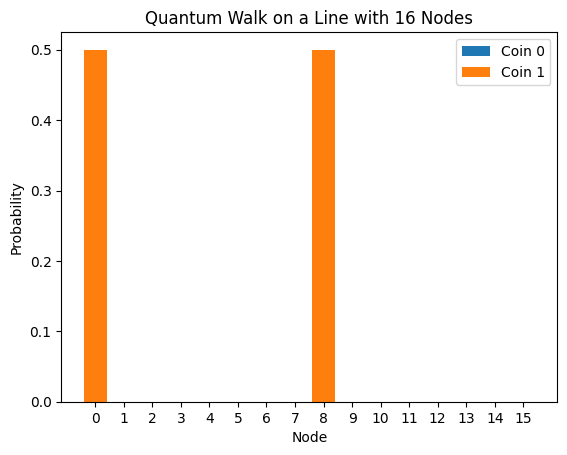

In [2]:
# Define the shift operator for a line with 16 nodes
def shift_operator_line():
    n = 16
    shift_op = np.zeros((2*n, 2*n), dtype=complex)
    for i in range(n-1):
        shift_op[2*i, 2*i+1] = 1
        shift_op[2*i+1, 2*i] = 1
    return shift_op

# Define the coin operator (Hadamard gate)
def coin_operator_line():
    H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    return np.kron(np.eye(16), H)

# Combine the coin and shift operators
def quantum_walk_operator_line():
    shift_op = shift_operator_line()
    coin_op = coin_operator_line()
    return np.dot(shift_op, coin_op)

# Initialize the walker's state
initial_state_line = np.zeros(32, dtype=complex)
initial_state_line[0] = 1 / np.sqrt(2)
initial_state_line[16] = 1 / np.sqrt(2)

# Apply the quantum walk operator
def apply_quantum_walk_line(initial_state, steps):
    qwalk_op = quantum_walk_operator_line()
    state = initial_state.copy()
    for _ in range(steps):
        state = np.dot(qwalk_op, state)
    return state

# Visualize the results
def plot_probabilities_line(state):
    probabilities = np.abs(state)**2
    nodes = [str(i) for i in range(16)]
    plt.bar(nodes, probabilities[::2], label='Coin 0')
    plt.bar(nodes, probabilities[1::2], bottom=probabilities[::2], label='Coin 1')
    plt.xlabel('Node')
    plt.ylabel('Probability')
    plt.title('Quantum Walk on a Line with 16 Nodes')
    plt.legend()
    plt.show()

# Run the quantum walk
steps = 10
final_state_line = apply_quantum_walk_line(initial_state_line, steps)
plot_probabilities_line(final_state_line)
